<a href="https://colab.research.google.com/github/js2nijjar/portfoliooptimization/blob/main/PortfolioOptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [241]:
tickers = ['AAPL',       # Apple
          'KO',         # Coca-Cola
          'DIS',        # Disney
          'XOM',        # Exxon Mobil
          'JPM',        # JPMorgan Chase
          'MCD',        # McDonald's
          'WMT']         # Walmart

In [242]:
historical_data = {}

In [243]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cvxopt import solvers
from cvxopt import matrix

In [244]:
for ticker in tickers:
    data = yf.download(ticker, start='2023-01-1', end='2024-08-23')
    historical_data[ticker] = data['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [245]:
historical_data

{'AAPL': Date
 2023-01-03    123.904617
 2023-01-04    125.182610
 2023-01-05    123.855095
 2023-01-06    128.412247
 2023-01-09    128.937302
                  ...    
 2024-08-16    226.050003
 2024-08-19    225.889999
 2024-08-20    226.509995
 2024-08-21    226.399994
 2024-08-22    224.529999
 Name: Adj Close, Length: 412, dtype: float64,
 'KO': Date
 2023-01-03    59.665287
 2023-01-04    59.636856
 2023-01-05    58.954422
 2023-01-06    60.091812
 2023-01-09    59.343029
                 ...    
 2024-08-16    68.708961
 2024-08-19    68.510323
 2024-08-20    68.907593
 2024-08-21    69.096298
 2024-08-22    68.857941
 Name: Adj Close, Length: 412, dtype: float64,
 'DIS': Date
 2023-01-03    88.273735
 2023-01-04    91.260178
 2023-01-05    91.200638
 2023-01-06    93.184990
 2023-01-09    94.028336
                 ...    
 2024-08-16    89.300003
 2024-08-19    90.820000
 2024-08-20    89.739998
 2024-08-21    90.720001
 2024-08-22    89.919998
 Name: Adj Close, Length: 412, 

In [246]:
historical_data = pd.DataFrame(historical_data)

In [247]:
historical_data

,AAPL,KO,DIS,XOM,JPM,MCD,WMT
Date,,,,,,,
2023-01-03,123.904617,59.665287,88.273735,100.414627,128.934052,253.880554,46.692337
2023-01-04,125.182610,59.636856,91.260178,100.706871,130.136368,253.938232,46.744358
2023-01-05,123.855095,58.954422,91.200638,102.960098,130.107544,251.796341,46.585030
2023-01-06,128.412247,60.091812,93.184990,104.204559,132.597244,258.817383,47.726322
2023-01-09,128.937302,59.343029,94.028336,102.262444,132.049301,256.685181,47.131294
...,...,...,...,...,...,...,...
2024-08-16,226.050003,68.708961,89.300003,118.169998,213.970001,276.878815,73.449997
2024-08-19,225.889999,68.510323,90.820000,118.529999,215.449997,285.886414,73.720001
2024-08-20,226.509995,68.907593,89.739998,114.580002,214.520004,283.977539,74.540001


In [248]:
simple_daily_returns = historical_data.pct_change()
simple_daily_returns = simple_daily_returns.dropna()
simple_daily_returns

,AAPL,KO,DIS,XOM,JPM,MCD,WMT
Date,,,,,,,
2023-01-04,0.010314,-0.000477,0.033832,0.002910,0.009325,0.000227,0.001114
2023-01-05,-0.010605,-0.011443,-0.000652,0.022374,-0.000221,-0.008435,-0.003409
2023-01-06,0.036794,0.019293,0.021758,0.012087,0.019136,0.027884,0.024499
2023-01-09,0.004089,-0.012461,0.009050,-0.018638,-0.004132,-0.008238,-0.012468
2023-01-10,0.004456,-0.007666,0.008336,0.014935,0.008954,0.006211,-0.000621
...,...,...,...,...,...,...,...
2024-08-16,0.005918,0.007720,0.005744,-0.004717,0.011439,0.013170,0.006550
2024-08-19,-0.000708,-0.002891,0.017021,0.003046,0.006917,0.032533,0.003676
2024-08-20,0.002745,0.005799,-0.011892,-0.033325,-0.004317,-0.006677,0.011123


In [249]:
log_daily_returns = np.log(historical_data/historical_data.shift(1))
log_daily_returns = log_daily_returns.dropna()
log_daily_returns

,AAPL,KO,DIS,XOM,JPM,MCD,WMT
Date,,,,,,,
2023-01-04,0.010261,-0.000477,0.033272,0.002906,0.009282,0.000227,0.001114
2023-01-05,-0.010661,-0.011509,-0.000653,0.022127,-0.000222,-0.008470,-0.003414
2023-01-06,0.036133,0.019109,0.021525,0.012014,0.018955,0.027502,0.024204
2023-01-09,0.004080,-0.012539,0.009010,-0.018813,-0.004141,-0.008272,-0.012546
2023-01-10,0.004446,-0.007696,0.008301,0.014825,0.008914,0.006192,-0.000621
...,...,...,...,...,...,...,...
2024-08-16,0.005901,0.007691,0.005727,-0.004728,0.011374,0.013084,0.006529
2024-08-19,-0.000708,-0.002895,0.016878,0.003042,0.006893,0.032015,0.003669
2024-08-20,0.002741,0.005782,-0.011963,-0.033893,-0.004326,-0.006699,0.011062


In [250]:
historical_mean = log_daily_returns.mean().to_frame()
historical_mean

,0
AAPL,0.001446
KO,0.000349
DIS,0.000045
XOM,0.000324
JPM,0.001263
MCD,0.000303
WMT,0.001172


In [251]:
historical_variance = log_daily_returns.var().to_frame().T
historical_variance

,AAPL,KO,DIS,XOM,JPM,MCD,WMT
0,0.000189,0.000067,0.000292,0.000203,0.000167,0.000102,0.00011


In [252]:
historical_covariance = log_daily_returns.cov()
historical_covariance

,AAPL,KO,DIS,XOM,JPM,MCD,WMT
AAPL,0.000189,0.000017,0.000047,0.000008,0.000028,0.000027,0.000017
KO,0.000017,0.000067,0.000008,0.000017,0.000021,0.000041,0.000029
DIS,0.000047,0.000008,0.000292,0.000058,0.000060,0.000031,0.000019
XOM,0.000008,0.000017,0.000058,0.000203,0.000066,0.000026,0.000018
JPM,0.000028,0.000021,0.000060,0.000066,0.000167,0.000031,0.000019
MCD,0.000027,0.000041,0.000031,0.000026,0.000031,0.000102,0.000023
WMT,0.000017,0.000029,0.000019,0.000018,0.000019,0.000023,0.000110


In [253]:
historical_correlation = log_daily_returns.corr()
historical_correlation

,AAPL,KO,DIS,XOM,JPM,MCD,WMT
AAPL,1.000000,0.147179,0.198195,0.040820,0.156466,0.194268,0.114811
KO,0.147179,1.000000,0.055801,0.142815,0.194925,0.500059,0.343325
DIS,0.198195,0.055801,1.000000,0.239282,0.270289,0.180740,0.103485
XOM,0.040820,0.142815,0.239282,1.000000,0.356938,0.180751,0.118798
JPM,0.156466,0.194925,0.270289,0.356938,1.000000,0.239059,0.136669
MCD,0.194268,0.500059,0.180740,0.180751,0.239059,1.000000,0.219413
WMT,0.114811,0.343325,0.103485,0.118798,0.136669,0.219413,1.000000


In [254]:
number_of_portfolios = 5000
number_of_portfolios

5000

In [255]:
portfolio_returns = np.zeros(number_of_portfolios)
portfolio_returns

array([0., 0., 0., ..., 0., 0., 0.])

In [256]:
portfolio_standard_deviations = np.zeros(number_of_portfolios)
portfolio_standard_deviations

array([0., 0., 0., ..., 0., 0., 0.])

In [257]:
for index in range(number_of_portfolios):
    weights = np.random.rand(len(tickers))
    weights = weights / sum(weights)
    portfolio_return = np.dot(weights.T, historical_mean.values.flatten()) * 252
    portfolio_standard_deviation = np.sqrt(np.dot(weights.T, np.dot(historical_covariance, weights))) * np.sqrt(252)
    portfolio_returns[index] = portfolio_return
    portfolio_standard_deviations[index] = portfolio_standard_deviation

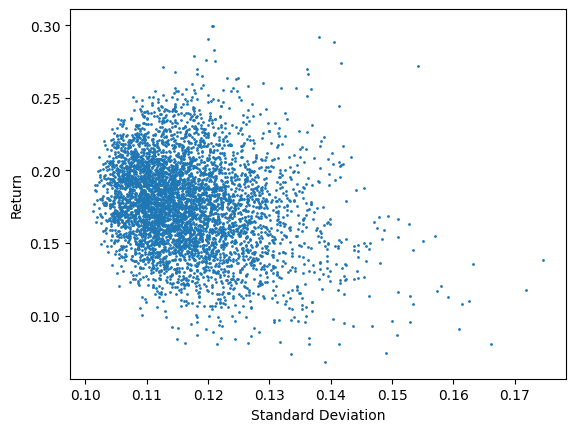

In [258]:
plt.plot(portfolio_standard_deviations, portfolio_returns, 'o', markersize = 1)
plt.xlabel('Standard Deviation')
plt.ylabel('Return')
plt.show()
# 5000 portfolios with randomly generated weights. As you can see asset allocation makes a big difference.

In [259]:
# Global Minimum Variance
historical_covariance_inverse = -np.linalg.inv(historical_covariance)
historical_covariance_inverse

array([[ -5743.20172422,    524.46066197,    738.97937491,
          -359.03197893,    556.36022688,    917.97170312,
           369.75885702],
       [   524.46066197, -22021.25979312,   -838.01614387,
           391.5369202 ,    871.48874713,   7700.50565984,
          4096.21919304],
       [   738.97937491,   -838.01614387,  -3969.80106787,
           749.30173053,    914.66672638,    807.97562401,
           335.02407794],
       [  -359.03197893,    391.5369202 ,    749.30173053,
         -5889.06865199,   1920.34690781,    544.06369291,
           333.87736639],
       [   556.36022688,    871.48874713,    914.66672638,
          1920.34690781,  -7476.30131238,    955.52172113,
           276.58785696],
       [   917.97170312,   7700.50565984,    807.97562401,
           544.06369291,    955.52172113, -13893.44600522,
           359.06892564],
       [   369.75885702,   4096.21919304,    335.02407794,
           333.87736639,    276.58785696,    359.06892564,
        -10444.020

In [260]:
one_vector = np.ones(len(tickers))
one_vector

array([1., 1., 1., 1., 1., 1., 1.])

In [261]:
global_minimum_variance_weights = np.dot(historical_covariance_inverse, one_vector) / np.dot(one_vector.T, np.dot(historical_covariance_inverse, one_vector))
global_minimum_variance_weights

array([0.11929298, 0.36946909, 0.05026616, 0.09197721, 0.07892558,
       0.1039023 , 0.18616668])

In [262]:
global_minimum_variance_weights_dataframe = pd.DataFrame(global_minimum_variance_weights).T
global_minimum_variance_weights_dataframe.columns = tickers
global_minimum_variance_weights_dataframe

,AAPL,KO,DIS,XOM,JPM,MCD,WMT
0,0.119293,0.369469,0.050266,0.091977,0.078926,0.103902,0.186167


In [263]:
global_minimum_variance_standard_deviation = np.sqrt(np.dot(global_minimum_variance_weights.T, np.dot(historical_covariance, global_minimum_variance_weights))) * np.sqrt(252)
global_minimum_variance_standard_deviation

0.10019149394121486

In [264]:
# Maximum Return
mu_0 = np.max(historical_mean)
mu_0

0.0014464653740769268

In [265]:
y = np.matrix([mu_0, 1]).T
y.shape

(2, 1)

In [266]:
B = np.hstack((historical_mean.values, one_vector.reshape(len(tickers),1)))
B.shape

(7, 2)

In [267]:
A = np.matrix([[np.dot(historical_mean.values.T,np.dot(historical_covariance_inverse, historical_mean.values)).item(),np.dot(historical_mean.values.T,np.dot(historical_covariance_inverse,one_vector.reshape(len(tickers),1))).item()],[np.dot(historical_mean.values.T,np.dot(historical_covariance_inverse,one_vector.reshape(len(tickers),1))).item(),np.dot(one_vector.reshape(len(tickers),1).T,np.dot(historical_covariance_inverse,one_vector.reshape(len(tickers),1))).item()]])
A.shape

(2, 2)

In [268]:
weights_maximum_return = np.dot(historical_covariance_inverse, np.dot(B, np.dot(np.linalg.inv(A), y)))
weights_maximum_return

matrix([[ 0.33203307],
        [ 0.02299245],
        [-0.10627695],
        [-0.01096138],
        [ 0.33425567],
        [-0.04951611],
        [ 0.47747324]])

In [269]:
weights_maximum_return_dataframe = pd.DataFrame(weights_maximum_return.T)
weights_maximum_return_dataframe.columns = tickers
weights_maximum_return_dataframe

,AAPL,KO,DIS,XOM,JPM,MCD,WMT
0,0.332033,0.022992,-0.106277,-0.010961,0.334256,-0.049516,0.477473


In [270]:
N = 100
efficient_frontier_left = np.min(historical_mean)
efficient_frontier_right = np.max(historical_mean)
efficient_frontier_target_returns = np.linspace(efficient_frontier_left, efficient_frontier_right, N)

In [271]:
efficient_frontier_left

4.4958038352890124e-05

In [272]:
efficient_frontier_right

0.0014464653740769268

In [273]:
efficient_frontier_target_returns

array([4.49580384e-05, 5.91146781e-05, 7.32713179e-05, 8.74279576e-05,
       1.01584597e-04, 1.15741237e-04, 1.29897877e-04, 1.44054517e-04,
       1.58211156e-04, 1.72367796e-04, 1.86524436e-04, 2.00681076e-04,
       2.14837715e-04, 2.28994355e-04, 2.43150995e-04, 2.57307635e-04,
       2.71464274e-04, 2.85620914e-04, 2.99777554e-04, 3.13934194e-04,
       3.28090833e-04, 3.42247473e-04, 3.56404113e-04, 3.70560753e-04,
       3.84717392e-04, 3.98874032e-04, 4.13030672e-04, 4.27187312e-04,
       4.41343951e-04, 4.55500591e-04, 4.69657231e-04, 4.83813871e-04,
       4.97970511e-04, 5.12127150e-04, 5.26283790e-04, 5.40440430e-04,
       5.54597070e-04, 5.68753709e-04, 5.82910349e-04, 5.97066989e-04,
       6.11223629e-04, 6.25380268e-04, 6.39536908e-04, 6.53693548e-04,
       6.67850188e-04, 6.82006827e-04, 6.96163467e-04, 7.10320107e-04,
       7.24476747e-04, 7.38633386e-04, 7.52790026e-04, 7.66946666e-04,
       7.81103306e-04, 7.95259945e-04, 8.09416585e-04, 8.23573225e-04,
      

In [274]:
weights_maximum_return

matrix([[ 0.33203307],
        [ 0.02299245],
        [-0.10627695],
        [-0.01096138],
        [ 0.33425567],
        [-0.04951611],
        [ 0.47747324]])

In [275]:
# max_weight = 0.2
# P = matrix(historical_covariance.values)
# q = matrix(np.zeros((len(tickers),1)))
# S = matrix(np.hstack((historical_mean.values,one_vector.reshape(len(tickers),1))).T)
# b = matrix([mu_0, 1])
# G = matrix(-np.eye(len(tickers)))
# G = matrix(np.vstack((-np.eye(len(tickers)), np.eye(len(tickers)))))
# h = matrix(np.zeros((len(tickers),1)))
# h = matrix(np.vstack((np.zeros((len(tickers), 1)), max_weight*one_vector.reshape(len(tickers), 1))))
# solution = solvers.qp(P, q, A=S, b=b, G=G, h=h)
# solution = solvers.qp(P, q, A=S, b=b)
# efficient_frontier_weights = np.array(solution['x'])
# efficient_frontier_weights_dataframe = pd.DataFrame(efficient_frontier_weights.T)
# efficient_frontier_weights_dataframe.columns = tickers
# efficient_frontier_weights_dataframe

In [276]:
P = matrix(historical_covariance.values)
q = matrix(np.zeros((len(tickers),1)))
S = matrix(np.hstack((historical_mean.values,one_vector.reshape(len(tickers),1))).T)
efficient_frontier_weights = [solvers.qp(P, q, A=S, b=matrix([t, 1]))['x'] for t in efficient_frontier_target_returns]
efficient_frontier_returns = [(np.dot(w.T, historical_mean.values.flatten())*250).item() for w in efficient_frontier_weights]
efficient_frontier_standard_deviation = [(np.sqrt(np.dot(w.T, np.dot(historical_covariance, w)) * 250)).item() for w in efficient_frontier_weights]
efficient_frontier_weights_dataframe = pd.DataFrame(efficient_frontier_weights)
efficient_frontier_weights_dataframe.columns = tickers
efficient_frontier_weights_dataframe_positive = efficient_frontier_weights_dataframe.where(efficient_frontier_weights_dataframe > 0)
efficient_frontier_weights_dataframe_positive = efficient_frontier_weights_dataframe_positive.dropna()
efficient_frontier_weights_dataframe_positive.shape[0]

34

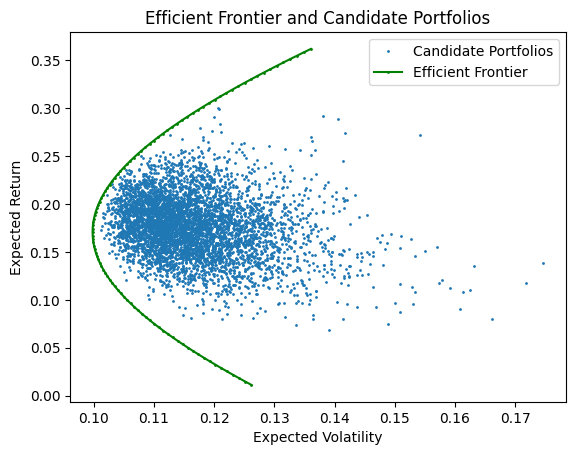

In [277]:
plt.plot(portfolio_standard_deviations, portfolio_returns, 'o', markersize=1, label='Candidate Portfolios')
plt.plot(efficient_frontier_standard_deviation, efficient_frontier_returns, 'o-', color='green', markersize=1, label='Efficient Frontier')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier and Candidate Portfolios')
plt.legend(loc='best')
plt.show()

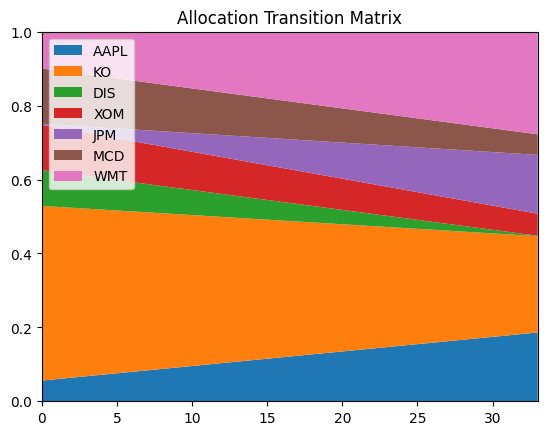

In [278]:
# Transition Matrix
plt.stackplot(range(efficient_frontier_weights_dataframe_positive.shape[0]), efficient_frontier_weights_dataframe_positive.T, labels=tickers)
plt.legend(loc='upper left')
plt.margins(0, 0)
plt.title('Allocation Transition Matrix')
plt.show()

In [279]:
# Maximum Sharpe
annualized_risk_free_rate = 0.04615
daily_risk_free_rate = annualized_risk_free_rate/252
weights_sharpe_ratio = np.dot(historical_covariance_inverse, historical_mean.values-daily_risk_free_rate*one_vector.reshape(len(tickers),1)) / np.dot(one_vector.reshape(len(tickers),1).T, np.dot(historical_covariance_inverse, historical_mean.values-daily_risk_free_rate*one_vector.reshape(len(tickers),1)))
weights_sharpe_ratio.shape

(7, 1)

In [280]:
weights_sharpe_ratio_dataframe = pd.DataFrame(weights_sharpe_ratio.T)
weights_sharpe_ratio_dataframe.columns = tickers
weights_sharpe_ratio_dataframe

,AAPL,KO,DIS,XOM,JPM,MCD,WMT
0,0.49799,-0.247292,-0.228395,-0.091263,0.533437,-0.169197,0.70472


In [281]:
sharpe_ratio_returns = np.dot(weights_sharpe_ratio.T, historical_mean.values) * 252
share_ratio_standard_deviation = np.sqrt(np.dot(weights_sharpe_ratio.T, np.dot(historical_covariance, weights_sharpe_ratio))) * np.sqrt(252)

In [282]:
sharpe_ratio_returns.item()

0.5146491368777675

In [283]:
share_ratio_standard_deviation.item()

0.1932771648460047

In [284]:
sharpe_ratio = (sharpe_ratio_returns.item() - annualized_risk_free_rate) / share_ratio_standard_deviation.item()
sharpe_ratio

2.423975627183109